# Demo Numpy et Sympy

Numpy et Sympy peuvent être utilisés ensemble pour résoudre facilement plusieurs problèmes algébriques souvent rencontrer en optique géométrique notamment lors d'utilisation de matrices. Ce notebook en montre quelques exemples.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Numpy - Algèbre linéaire

Commençons par couvrir l'utilisation de NumPy pour résoudre des problèmes matriciels. Résolvons le problème très simple

$$
\vec{y} = A\cdot \vec{x}
$$

où le vecteur $\vec{y}$ et la matrice $A$ sont connus et l'on cherche a résoudre pour $\vec{x}$.

Commençons par un exemple trivial

$$
\begin{bmatrix}3\\2\end{bmatrix} = 
\begin{bmatrix}1&2\\3&-1\end{bmatrix}\cdot\begin{bmatrix}1\\1\end{bmatrix}
$$

In [2]:
# Direct Solution (y from A and x)
A = np.array([[1, 2],
              [3, -1]])
x = np.array([1, 1])

# Numpy dot product (all equivalent notations)
y = np.dot(A, x) # function
y = A.dot(x)     # method
y = A@x          # operator (this is my favourite!)
print(y)

[3 2]


Maintenant, voyons comment inverser l'équation suivante et résoudre $\vec{x}$

$$
\begin{bmatrix}2\\3\end{bmatrix} = 
\begin{bmatrix}-1&4\\2&1\end{bmatrix}\cdot\vec{x}
$$

In [3]:
A = np.array([[-1, 4],
              [2, 1]])
y = np.array([2, 3])

# We compute the inverse of A
A_inverse = np.linalg.inv(A)
x = A_inverse@y
print(x) # Solution

# We can also check our answer
print(A@x)

[1.11111111 0.77777778]
[2. 3.]


Bien que peu utilisé dans ce cours, il est aussi très simple de calculer les valeurs propres et vecteurs propres d'une matrice. Par exemple,

$$
\mathcal{H} = \begin{bmatrix}-1&4&0\\2&1&2\\-1&0&6i\end{bmatrix}
$$

In [4]:
H = np.array([[-1, 4, 0],
              [2, 1, 2],
              [-1, 0, 6j]])

w, v = np.linalg.eig(H)
print('Eigenvalues\n', w)
print('Eigenvectors\n', v)

Eigenvalues
 [-3.09820733+0.1727297j   2.92109694-0.18109334j  0.17711039+6.00836365j]
Eigenvectors
 [[ 0.87706534+0.j          0.70988381+0.j         -0.16847852-0.00795603j]
 [-0.46006623+0.03787381j  0.69588081-0.03213881j -0.03762878-0.25541133j]
 [ 0.06238709-0.11734091j -0.04436663-0.09388058j  0.95126275+0.j        ]]


## Sympy - Calcul symbolique

Sympy nous permet de créer des objets *symboliques* pour ensuite les utiliser dans des équations. Par exemple, ici nous créons le *symbol* $x$ à partir de la *string* 'x' que nous plaçons dans la *variable* `x`

In [6]:
x = sp.symbols('x')
print(x)

x


Nous définissons l'expression $f(x) = x^2 + 47$ que l'on place dans la *variable* `f`.

In [12]:
f = x**2 + 47
print(f)

x**2 + 47


Nous résolvons maintenant $f(x) = x^2+47 = 51$

In [13]:
sp.solve(f-51)

[-2, 2]

Il est aussi facile de tracer les équations symboliques en utilisant `sp.plot()`. Nous ne pouvons pas utiliser *matplotlib* pour tracer des équations symboliques.

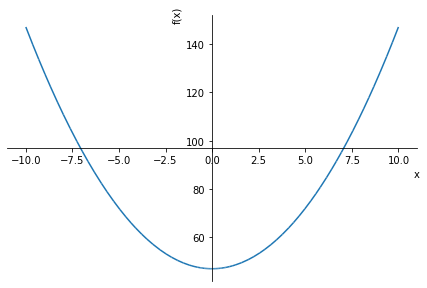

In [15]:
sp.plot(f)

## Sympy - résolution itérative

Comment résoudre itérativement une équation paramétrique avec sympy? Une équation paramétrique est une équation avec des inconnus (que l'on cherche à déterminer) et des paramètres (que l'on *stipule*/*décide*). Une notation courante est la forme $f_\theta(x)$ où $f$ est une *fonction* de $x$ *paramétrisée* par $\theta$. Bien sûr, rien n'empêche $x$ et $\theta$ d'être des vecteurs (ou matrices). Par exemple, $\textbf{x} = (x, y, z)$ serait une fonction dont le domaine est un espace 3D et ainsi de suite.

Nous pouvons donc *résoudre* itérativement $f_\theta(x)=0$ pour différentes valeurs de $\theta$ afin de tracer un graphique $x = g(\theta)$

Par exemple, soit un montage optique à une lentille mince. Le système est caractérisé par l'équation

$$
\frac{1}{s} + \frac{1}{s'} = \frac{1}{f}
$$

où

- $s$ est la position de l'objet à gauche de la lentille
- $s'$ est la position de l'image à droide de la lentille
- $f$ est la focale de la lentille ($f>0$ => convergente)

À quelle distance $s'$ sera formé l'image d'un objet situé à 1 m à gauche d'une lentille de focale $f \in [0, 3]$m? Bien sûr, nous pouvons ici facilement isoler

$$
s'(f) = \frac{f}{1-f}
$$

mais ce n'est pas toujours facile. À la place, utilisons sympy et la fonction paramétrique

$$
g_f(s') = 1+\frac{1}{s'}-\frac{1}{f}
$$

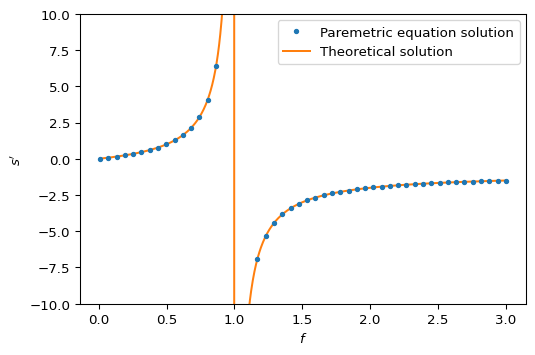

In [56]:
# Here I use a lambda function, but this could be a regular function
# or an expression defined in the following for loop
g = lambda s_image, f : 1+ 1/s_image - 1/f

# We define the range of values for f we want to solve for
frange = np.linspace(0.01, 3, 50)
# We create an empty list that will contain the solutions
image_distances = []
# We create a sympy symbol s
s = sp.symbols('s')

# We loop over each values of f in frange
for f in frange:
    equation = g(s, f) # We create the equation of s from a value of f
    s_solution = sp.solve(equation) # We solve the equation=0
    image_distances.append(s_solution) # We add the solution to the list

# We plot the results
plt.figure(dpi=96)
plt.plot(frange, image_distances, '.',
        label='Paremetric equation solution', zorder=5) # parametric solution

f = np.linspace(0.01, 3, 1000)
s = f/(1-f)
plt.plot(f, s, label='Theoretical solution') # theoretical solution
plt.xlabel('$f$')
plt.ylabel("$s'$")
plt.ylim([-10, 10])
plt.legend()

## Tying it together

Maintenant, *situation tout à fait **hypothétique** qui ne se produit **jamais*** (lire sarcasme svp https://en.wikipedia.org/wiki/Ray_transfer_matrix_analysis); vous avez les matrices suivantes

$$
M_t(d) = \begin{bmatrix}1&d\\0&1\end{bmatrix}
$$

$$
M_l(f) = \begin{bmatrix}1&0\\-\frac{1}{f}&1\end{bmatrix}
$$

et vous avez une série de multiplication (lire *système optique* \*\*cough cough\*\*) avec les matrices suivantes

$$
M = \begin{bmatrix}A&B\\C&D\end{bmatrix} = M_t(d=35mm)*M_l(f=25mm)\cdot M_t(d=x)\cdot M_l(f=50mm)\cdot M_t(d=s)
$$

et vous voulez déterminer la relation entre $x$ et $s$ faisant en sorte que B=0.

Text(0, 0.5, 'x [mm]')

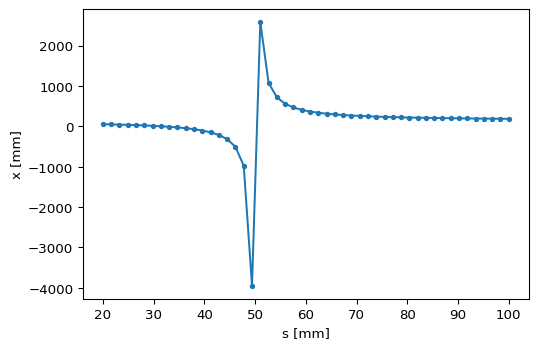

In [63]:
# I define a function for the translation matrix
def Mt(d):
    '''
        Translation ray transfer matrix
    '''
    M = np.array([[1, d],
                  [0, 1]])
    return M

# I define a function for the thin lens matrix
def Ml(f):
    '''
        Thin lens ray transfer matrix
    '''
    M = np.array([[1, 0],
                  [-1/f, 1]])
    return M

# I create a function for the total system matrix M
def M_system(x, s):
    '''
        Computes the total system transfer matrix
    '''
    M = Mt(d=35)@Ml(f=25)@Mt(d=x)@Ml(f=50)@Mt(d=s)
    return M

# I create the problem definition
x = sp.symbols('x') # symbolize x
srange = np.linspace(20, 100) # range of values for s
x_solutions = [] # empty array for solutions

# Iteratively solve the problem
for s in srange:
    Mtot = M_system(x, s) # compute the system's matrix
    B = Mtot[0, 1] # get B(x) from system's matrix
    x_sol = sp.solve(B) # Solve B(x) = 0 Carefull, there may be many solutions...
    x_solutions.append(sp.solve(B)) # add solution to list
    
# plot results
plt.figure(dpi=96)
plt.plot(srange, x_solutions, '.-')
plt.xlabel('s [mm]')
plt.ylabel('x [mm]')